# Uber Fares Dataset - Data Preparation with Python

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load the Dataset

In [9]:
# Load the cleaned dataset
df = pd.read_csv("alcohol.csv")

# Preview the data
df.head()


,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,RATE_PER_CAPITA_N,RATE_PER_CAPITA_NL,RATE_PER_CAPITA_NU
0,EE6F72ASA_0000001688,SA_0000001688,EE6F72A,SA_0000001688,2003,YEAR,192,COUNTRY,PUBLISHED,Alcohol consumption (age 15+),Cuba,TOTAL,5.885221,4.503071,7.410578
1,EE6F72ASA_0000001688,SA_0000001688,EE6F72A,SA_0000001688,2003,YEAR,196,COUNTRY,PUBLISHED,Alcohol consumption (age 15+),Cyprus,TOTAL,7.142592,5.563809,8.754144
2,EE6F72ASA_0000001688,SA_0000001688,EE6F72A,SA_0000001688,2003,YEAR,199,CLASSIFICATION,PUBLISHED,Alcohol consumption (age 15+),Least developed countries,TOTAL,2.029877,1.895321,2.216005
3,EE6F72ASA_0000001688,SA_0000001688,EE6F72A,SA_0000001688,2003,YEAR,202,REGION,PUBLISHED,Alcohol consumption (age 15+),Sub-Saharan Africa,TOTAL,3.860405,3.588745,4.177033
4,EE6F72ASA_0000001688,SA_0000001688,EE6F72A,SA_0000001688,2003,YEAR,203,COUNTRY,PUBLISHED,Alcohol consumption (age 15+),Czechia,TOTAL,14.557763,12.680295,16.571871


## Explore the Dataset

In [14]:
print("Shape of the dataset:", df.shape)
print("\nData Types and Missing Values:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values Count:")
print(df.isnull().sum())


Shape of the dataset: (5405, 15)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5405 entries, 0 to 5404
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IND_ID                  5405 non-null   object 
 1   IND_CODE                5405 non-null   object 
 2   IND_UUID                5405 non-null   object 
 3   IND_PER_CODE            5405 non-null   object 
 4   DIM_TIME                5405 non-null   int64  
 5   DIM_TIME_TYPE           5405 non-null   object 
 6   DIM_GEO_CODE_M49        5405 non-null   int64  
 7   DIM_GEO_CODE_TYPE       5405 non-null   object 
 8   DIM_PUBLISH_STATE_CODE  5405 non-null   object 
 9   IND_NAME                5405 non-null   object 
 10  GEO_NAME_SHORT          5382 non-null   object 
 11  DIM_SEX                 5405 non-null   object 
 12  RATE_PER_CAPITA_N       5405 non-null   float64
 13  RATE_PER_CAPITA_NL      5405

## Clean the Data

In [10]:
import pandas as pd

# Load your dataset
df = pd.read_csv("alcohol.csv")

# Step 1: Keep only the relevant columns
df_cleaned = df[['DIM_TIME', 'GEO_NAME_SHORT', 'RATE_PER_CAPITA_N']].copy()

# Step 2: Drop rows with missing country names
df_cleaned = df_cleaned.dropna(subset=['GEO_NAME_SHORT'])

# Step 3: Rename columns for easier access
df_cleaned.rename(columns={
    'DIM_TIME': 'Year',
    'GEO_NAME_SHORT': 'Country',
    'RATE_PER_CAPITA_N': 'AlcoholPerCapita'
}, inplace=True)

# Optional: Preview the cleaned dataset
print(df_cleaned.head())


   Year                    Country  AlcoholPerCapita
0  2003                       Cuba          5.885221
1  2003                     Cyprus          7.142592
2  2003  Least developed countries          2.029877
3  2003         Sub-Saharan Africa          3.860405
4  2003                    Czechia         14.557763


## 📈 1. Global Average Alcohol Consumption Over Time

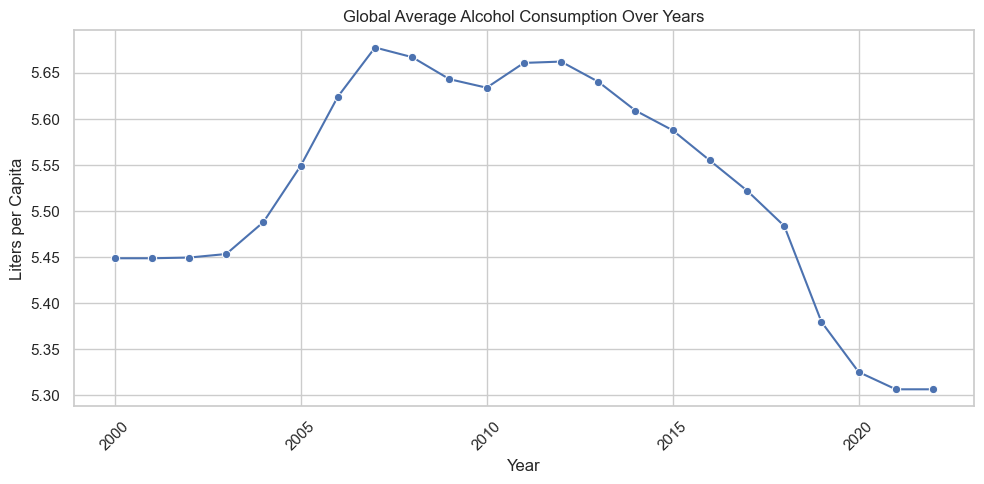

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Global trend over years
global_trend = df_cleaned.groupby("Year")["AlcoholPerCapita"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=global_trend, x="Year", y="AlcoholPerCapita", marker="o")
plt.title("Global Average Alcohol Consumption Over Years")
plt.ylabel("Liters per Capita")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Export the Cleaned Dataset

In [12]:
# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv("cleaned_alcohol_consumption.csv", index=False)

print("✅ Cleaned data saved as 'cleaned_alcohol_consumption.csv'")


✅ Cleaned data saved as 'cleaned_alcohol_consumption.csv'


In [13]:
print(df_cleaned.describe())


              Year  AlcoholPerCapita
count  5382.000000       5382.000000
mean   2011.000000          5.527157
std       6.633866          4.065980
min    2000.000000          0.000000
25%    2005.000000          2.030171
50%    2011.000000          4.742806
75%    2017.000000          8.605679
max    2022.000000         19.497715
